<a href="https://colab.research.google.com/github/KyungRyeolBaek/study/blob/main/AI%20study/ODE/ErrorCorr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Error Corr

In [1]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr
from autograd.core import primitive
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import torch

nx = 10
dx = 1. / nx

def A(x):
    '''
        Left part of initial equation
    '''
    return x + (1. + 3.*x**2) / (1. + x + x**3)


def B(x):
    '''
        Right part of initial equation
    '''
    return x**3 + 2.*x + x**2 * ((1. + 3.*x**2) / (1. + x + x**3))


def f(x, psy):
    '''
        d(psy)/dx = f(x, psy)
        This is f() function on the right
    '''
    return B(x) - psy * A(x)

def loss_function(W, x):
    loss_sum = 0.
    for xi in x:
        net_out = neural_network(W, xi)[0][0]
        psy_t = 1. + xi * net_out
        d_net_out = d_neural_network_dx(W, xi)[0][0]
        d_psy_t = net_out + xi * d_net_out
        func = f(xi, psy_t)       
        err_sqr = (d_psy_t - func)**2

        loss_sum += err_sqr
    return loss_sum

def sigmoid(x):
    return 1 / (1 + tf.math.exp(-x))


def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

def neural_network(W, x):
    a1 = sigmoid(tf.tensordot(x, W[0], axes = 1))
    return tf.tensordot(a1, W[1], axes = 1)


def d_neural_network_dx(W, x, k=1):
    return tf.tensordot(tf.tensordot(tf.transpose(W[1]), tf.transpose(W[0])**k, axes = 1), sigmoid_grad(x), axes = 1)

x_space = tf.Variable(tf.random_normal([1]), name = 'x')
W = [tf.Variable(tf.random_normal([1, 10])), tf.Variable(tf.random_normal([10, 1]))]

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

ye = x_space * neural_network(W, x_space)
yeprime = neural_network(W, x_space) + x_space * d_neural_network_dx(W, x_space)

cost = tf.reduce_mean(tf.square(yeprime - ye))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)
step_number = 10

print(sess.run(x_space))
print(sess.run(W))
print(sess.run(tf.math.exp(-x_space)))
print(sess.run(sigmoid(x_space)))
print(sess.run(sigmoid_grad(x_space)))
a = tf.tensordot(x_space, W[0], axes = 1)
print(sess.run(a))
print(sess.run(tf.tensordot(a, W[1], axes = 1)))
print(sess.run(neural_network(W, x_space)))

Instructions for updating:
non-resource variables are not supported in the long term
[-0.5615906]
[array([[-0.2461683 , -0.35970008, -0.9741783 , -0.65591747, -0.69732386,
         0.6693573 ,  1.5879629 , -0.55374944,  0.88141745,  0.7780367 ]],
      dtype=float32), array([[ 1.5640213 ],
       [ 0.5769057 ],
       [ 0.01122065],
       [ 0.16900086],
       [-0.373145  ],
       [-2.2876396 ],
       [-0.17393512],
       [ 0.4192972 ],
       [ 0.00344673],
       [ 1.8836212 ]], dtype=float32)]
[1.7534593]
[0.36317948]
[0.23128015]
[ 0.1382458   0.2020042   0.5470894   0.3683571   0.39161053 -0.37590477
 -0.891785    0.3109805  -0.49499577 -0.4369381 ]
[0.5757293]
[1.0384772]


In [1]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr
from autograd.core import primitive
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import torch

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
nx = 10
dx = 1. / nx

def A(x):
    '''
        Left part of initial equation
    '''
    return x + (1. + 3.*x**2) / (1. + x + x**3)


def B(x):
    '''
        Right part of initial equation
    '''
    return x**3 + 2.*x + x**2 * ((1. + 3.*x**2) / (1. + x + x**3))


def f(x, psy):
    '''
        d(psy)/dx = f(x, psy)
        This is f() function on the right
    '''
    return B(x) - psy * A(x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))


def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def d_neural_network_dx(W, x, k=1):
    return np.dot(np.dot(W[1].T, W[0].T**k), sigmoid_grad(x))


def loss_function(W, x):
    loss_sum = 0.
    for xi in x:
        net_out = neural_network(W, xi)[0][0]
        psy_t = 1. + xi * net_out
        d_net_out = d_neural_network_dx(W, xi)[0][0]
        d_psy_t = net_out + xi * d_net_out
        func = f(xi, psy_t)       
        err_sqr = (d_psy_t - func)**2

        loss_sum += err_sqr
    return loss_sum

# x_space = np.linspace(0, 1, nx)
# W = [npr.randn(1, 10), npr.randn(10, 1)]
# lmb = 0.001

# for i in range(1000):
#     loss_grad =  grad(loss_function)(W, x_space)
    
#     W[0] = W[0] - lmb * loss_grad[0]
#     W[1] = W[1] - lmb * loss_grad[1]

# res = [1 + xi * neural_network(W, xi)[0][0] for xi in x_space]
# neural_network(W, 1) 

0 Cost:  0.19036308 

200 Cost:  0.18666263 

400 Cost:  0.18303311 

600 Cost:  0.17947467 

800 Cost:  0.1759774 

1000 Cost:  0.1725474 

0 Cost:  14.133715 

200 Cost:  10.31195 

400 Cost:  7.741233 

600 Cost:  5.9452167 

800 Cost:  4.6513267 

1000 Cost:  3.6953375 

0 Cost:  0.83135724 

200 Cost:  0.82181895 

400 Cost:  0.81231827 

600 Cost:  0.80283487 

800 Cost:  0.7933644 

1000 Cost:  0.7839246 

0 Cost:  1.4144267 

200 Cost:  1.393311 

400 Cost:  1.3726568 

600 Cost:  1.3524469 

800 Cost:  1.3326726 

1000 Cost:  1.3133128 

0 Cost:  7.695417 

200 Cost:  7.3281083 

400 Cost:  6.9963202 

600 Cost:  6.695079 

800 Cost:  6.4202952 

1000 Cost:  6.168556 

0 Cost:  0.036843296 

200 Cost:  0.035161264 

400 Cost:  0.033561636 

600 Cost:  0.0320413 

800 Cost:  0.030594371 

1000 Cost:  0.029216046 

0 Cost:  0.94895977 

200 Cost:  0.91172355 

400 Cost:  0.8763664 

600 Cost:  0.8427682 

800 Cost:  0.81081706 

1000 Cost:  0.78040475 

0 Cost:  9.221757 

200 C

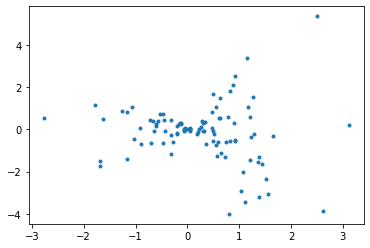

In [3]:
def sigmoid(x):
    return 1 / (1 + tf.math.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

def neural_network(W, x):
    a1 = sigmoid(tf.tensordot(x, W[0], axes = 1))
    return tf.tensordot(a1, W[1], axes = 1)


def d_neural_network_dx(W, x, k=1):
    return tf.tensordot(tf.tensordot(tf.transpose(W[1]), tf.transpose(W[0])**k, axes = 1), sigmoid_grad(x), axes = 1)

x_space = []
y_space = []
x_number = 100
step_number = 1000
for _ in range(x_number):
  x = tf.Variable(tf.random_normal([1]), name = 'x')
  W = [tf.Variable(tf.random_normal([1, 10])), tf.Variable(tf.random_normal([10, 1]))]


  sess = tf.Session()
  init = tf.global_variables_initializer()
  sess.run(init)


  ye = x * neural_network(W, x)
  yeprime = neural_network(W, x) + x * d_neural_network_dx(W, x)

  cost = tf.reduce_mean(tf.square(yeprime - ye))
  optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
  train = optimizer.minimize(cost)


  for step in range(step_number + 1):
    cost_val, yprime_val, y_val, x_val, _ = sess.run([cost, yeprime, ye, x, train])
    if step % int(step_number / 5) == 0:
        # print(step, "Cost: ", cost_val, "\n")

  x_space += list(x_val)
  y_space += list(y_val)
  sess.close()
plt.plot(x_space, y_space, '.')
plt.show()

In [14]:
print(sess.run(x))
print(y_val)
print(x_space)
print(y_space)
k = []
k += sess.run(x)[0]
print(k)
sess.run(x)[0]

[-0.3852157]
[0.7007577]
[]
[]
[]


-0.3852157

In [35]:
a = []
a += list(x_val)
print(a)
print(sess.run(x))
print(x_val)

[-0.3852157]
[-0.3852157]
[-0.3852157]


In [10]:
x = 1
W[0] = [1, 2, 3]
W[1] = [1, 2, 3]

np.dot(x, W[0])
np.dot(np.dot(x, W[0]), W[1])

14

In [ ]:
W[0]

<tf.Variable 'Variable_69:0' shape=(1, 10) dtype=float32_ref>

In [ ]:
W[1]

<tf.Variable 'Variable_70:0' shape=(10, 1) dtype=float32_ref>

In [ ]:
tf.Variable(np.dot(x_space, W[0])[0])

<tf.Variable 'Variable_83:0' shape=(1,) dtype=float32_ref>

In [ ]:
tf.Variable(np.dot(x_space, W[0]))

TypeError: ignored

In [ ]:
np.dot(tf.Variable(1))

<tf.Tensor 'mul_98:0' shape=(10, 10) dtype=float32>

In [ ]:
np.dot(tf.Variable(sigmoid(np.dot(x_space, W[0]))), W[1])

<tf.Tensor 'mul_86:0' shape=(10, 10) dtype=float32>

In [ ]:
tf.transpose(W[0])

<tf.Tensor 'transpose_7:0' shape=(10, 1) dtype=float32>

In [ ]:
tf.Variable(tf.transpose(W[1]))**1

<tf.Tensor 'pow_48:0' shape=(1, 10) dtype=float32>

In [ ]:
np.dot(tf.Variable(tf.transpose(W[1])), tf.Variable(tf.transpose(W[0])**1))

<tf.Tensor 'mul_101:0' shape=(10, 10) dtype=float32>

In [ ]:
tf.Variable(sigmoid_grad(x_space))

<tf.Variable 'Variable_70:0' shape=(10,) dtype=float32_ref>

In [ ]:
def graph_N(w_number, x_number, step_number):
  

  x_space = np.linspace(-1, 1, x_number)
  W = [tf.Variable(tf.random_normal([1, 10])), tf.Variable(tf.random_normal([10, 1]))]

  ye = torch.Tensor([neural_network(W, xi)[0][0] for xi in x_space] )
  yeprime = torch.Tensor([neural_network(W, xi)[0][0] for xi in x_space] + [xi*d_neural_network_dx(W, xi) for xi in x_space])

  ys = 1
  ysprime = 0
  x = tf.Variable(tf.random_normal([x_number]), name = 'x')

  for i in range(1, w_number + 1):
    globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
    ys += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
    ysprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)
  
  cost = tf.reduce_mean(tf.square(yeprime - ye) + tf.square(ysprime - ys))
  optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
  train = optimizer.minimize(cost)

  sess = tf.Session()
  sess.run(tf.global_variables_initializer())

  for step in range(step_number + 1):
    for i in range(1, w_number + 1):
        globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
    cost_val, yprime_val, y_val, x_val, _ = sess.run([cost, yprime, y, x, train])
    if step % int(step_number / 5) == 0:
  #         print(step, "Cost: ", cost_val, "\nx: ", x_val,  "yprime: ", yprime_val, "y: ", y_val)
        print(step, "Cost: ", cost_val, "\n")
        print("w1: ", w1_val, "w2: ", w2_val, "w3: ", w3_val, "w4: ", w4_val, "w5: ", w5_val, "w6: ", w6_val, "\n")
        
  def y(x):
    answer = 1
    for i in range(1, w_number + 1):
        answer += globals()['w{}_val'.format(i)]*(x**i)
    return answer[0]

  globals()['w{}x{}'.format(w_number, x_number)] = [x_val, y(x_val)]
  plt.plot(x_val, y(x_val), '.')
  plt.show()

In [ ]:
graph_N(10,10,10)

NotImplementedError: ignored

0 Cost:  24315.99 

w1:  [array([0.720313], dtype=float32)] w2:  [array([-0.11088338], dtype=float32)] w3:  [array([-0.8730286], dtype=float32)] w4:  [array([-0.12122729], dtype=float32)] w5:  [array([0.771264], dtype=float32)] w6:  [array([2.012427], dtype=float32)] 

6000 Cost:  1.2354578 

w1:  [array([0.63914126], dtype=float32)] w2:  [array([-0.14555836], dtype=float32)] w3:  [array([-1.0098164], dtype=float32)] w4:  [array([-0.5728918], dtype=float32)] w5:  [array([0.39954326], dtype=float32)] w6:  [array([0.351314], dtype=float32)] 

12000 Cost:  0.89722556 

w1:  [array([0.5465381], dtype=float32)] w2:  [array([-0.08965334], dtype=float32)] w3:  [array([-1.0495533], dtype=float32)] w4:  [array([-0.55496764], dtype=float32)] w5:  [array([0.36965778], dtype=float32)] w6:  [array([0.29768625], dtype=float32)] 

18000 Cost:  0.73234767 

w1:  [array([0.47052965], dtype=float32)] w2:  [array([-0.04407624], dtype=float32)] w3:  [array([-1.0642647], dtype=float32)] w4:  [array([-0.532

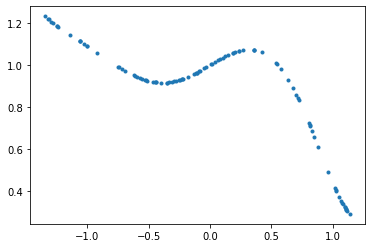

/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)
/usr/local/lib/python3.7/dist-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


0 Cost:  nan 

w1:  [array([0.4393215], dtype=float32)] w2:  [array([0.36696914], dtype=float32)] w3:  [array([0.8621625], dtype=float32)] w4:  [array([-0.7573], dtype=float32)] w5:  [array([0.19124465], dtype=float32)] w6:  [array([-0.04025832], dtype=float32)] 

6000 Cost:  nan 

w1:  [array([nan], dtype=float32)] w2:  [array([nan], dtype=float32)] w3:  [array([nan], dtype=float32)] w4:  [array([nan], dtype=float32)] w5:  [array([nan], dtype=float32)] w6:  [array([nan], dtype=float32)] 

12000 Cost:  nan 

w1:  [array([nan], dtype=float32)] w2:  [array([nan], dtype=float32)] w3:  [array([nan], dtype=float32)] w4:  [array([nan], dtype=float32)] w5:  [array([nan], dtype=float32)] w6:  [array([nan], dtype=float32)] 

18000 Cost:  nan 

w1:  [array([nan], dtype=float32)] w2:  [array([nan], dtype=float32)] w3:  [array([nan], dtype=float32)] w4:  [array([nan], dtype=float32)] w5:  [array([nan], dtype=float32)] w6:  [array([nan], dtype=float32)] 

24000 Cost:  nan 

w1:  [array([nan], dtype

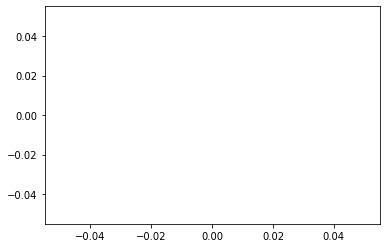

/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)


0 Cost:  nan 

w1:  [array([0.30821353], dtype=float32)] w2:  [array([0.6569976], dtype=float32)] w3:  [array([0.46274525], dtype=float32)] w4:  [array([0.16459513], dtype=float32)] w5:  [array([0.10649665], dtype=float32)] w6:  [array([1.3169963], dtype=float32)] 

6000 Cost:  nan 

w1:  [array([nan], dtype=float32)] w2:  [array([nan], dtype=float32)] w3:  [array([nan], dtype=float32)] w4:  [array([nan], dtype=float32)] w5:  [array([nan], dtype=float32)] w6:  [array([nan], dtype=float32)] 

12000 Cost:  nan 

w1:  [array([nan], dtype=float32)] w2:  [array([nan], dtype=float32)] w3:  [array([nan], dtype=float32)] w4:  [array([nan], dtype=float32)] w5:  [array([nan], dtype=float32)] w6:  [array([nan], dtype=float32)] 

18000 Cost:  nan 

w1:  [array([nan], dtype=float32)] w2:  [array([nan], dtype=float32)] w3:  [array([nan], dtype=float32)] w4:  [array([nan], dtype=float32)] w5:  [array([nan], dtype=float32)] w6:  [array([nan], dtype=float32)] 

24000 Cost:  nan 

w1:  [array([nan], dty

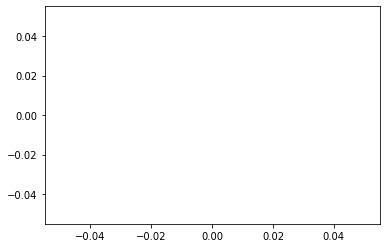

In [ ]:
graph_N(6, 100, 30000)
graph_N(6, 1000, 30000)
graph_N(6, 10000, 30000)

In [ ]:
graph_N(6, 6, 100)

ValueError: ignored

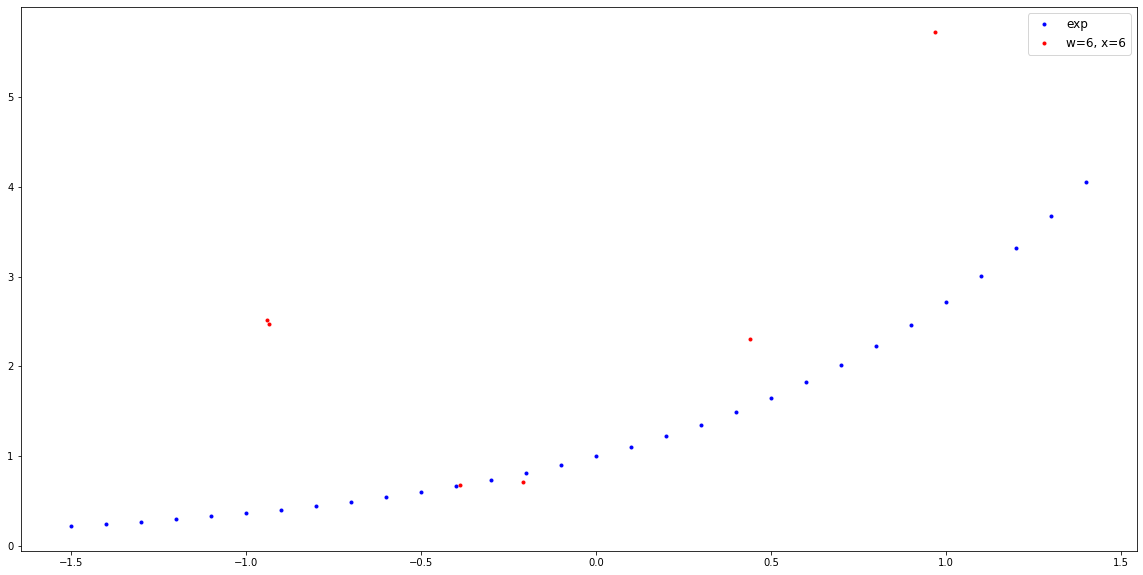

In [ ]:
x = np.array([i for i in range(-15, 15, 1)])
plt.figure(figsize = (20, 10))
plt.plot(0.1*x, np.exp(0.1*x), '.b', label = 'exp')
plt.plot(w6x6[0],w6x6[1], '.r', label = 'w=6, x=6')
# plt.plot(w6x100[0],w6x100[1], '.r', label = 'w=6, x=100')
# plt.plot(w6x1000[0],w6x1000[1], '.g', label = 'w=6, x=1000')
# plt.plot(w6x10000[0],w6x10000[1], '.c', label = 'w=6, x=10000')
plt.legend(loc = 'upper right', fontsize = 'large')

plt.show()